# DAO2702 Final Project
Tutorial: T-01  
Group: Bubble Tea  
Members: Anni Lei, Friscilia Sultan, Isaiah Koh, Jiang Siyuan, Mao Zhi, Ng Zi Wei

## Overview
Our team project seeks to analyse a dataset containing the information of 10,000 credit card customers from a bank. The data was obtained from https://www.kaggle.com/sakshigoyal7/credit-card-customers. The scenario presented is: "A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction"

Our team project aims to **produce visualisations from the data in order to identify potential indicators for customers who are likely to be churned, and apply statistical models to test our hypotheses.**

## Dataset
Our dataset consists of 10127 customers with 21 variables per customer.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('BankChurners.csv').drop(columns='CLIENTNUM')
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Exploratory Data Analysis
We begin by performing some exploratory data analysis to identify potential patterns and anomalies in the data. Using the code below, we can generate summary statistics of each variable.

In [7]:
unique_vals = [np.sort(data[col].unique()) for col in data]

(attri_range, age_range, gender_range, depend_range, edu_range, marital_range, income_range, 
 card_range, onbook_range, relationship_range, inactive_range, contacts_range, limit_range, 
 revolving_range, open_range, amtchange_range , transamt_range, transct_range, ctchange_range, 
 util_range) = unique_vals

for val_range, col_head in zip(unique_vals, data.columns):
    if val_range.dtype == "int64":
        print("{0}: {1:d} - {2:d}".format(col_head, val_range.min(), val_range.max()))
    elif val_range.dtype == "float":
        print("{0}: {1:.3f} - {2:.3f}".format(col_head, val_range.min(), val_range.max()))
    else:
        print("{0}: {1}".format(col_head, val_range))

Attrition_Flag: ['Attrited Customer' 'Existing Customer']
Customer_Age: 26 - 73
Gender: ['F' 'M']
Dependent_count: 0 - 5
Education_Level: ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status: ['Divorced' 'Married' 'Single' 'Unknown']
Income_Category: ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Platinum' 'Silver']
Months_on_book: 13 - 56
Total_Relationship_Count: 1 - 6
Months_Inactive_12_mon: 0 - 6
Contacts_Count_12_mon: 0 - 6
Credit_Limit: 1438.300 - 34516.000
Total_Revolving_Bal: 0 - 2517
Avg_Open_To_Buy: 3.000 - 34516.000
Total_Amt_Chng_Q4_Q1: 0.000 - 3.397
Total_Trans_Amt: 510 - 18484
Total_Trans_Ct: 10 - 139
Total_Ct_Chng_Q4_Q1: 0.000 - 3.714
Avg_Utilization_Ratio: 0.000 - 0.999


### Summary graphs of each variable

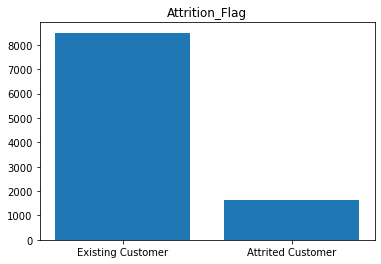

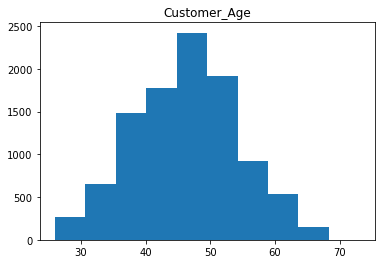

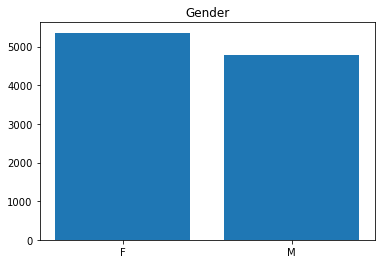

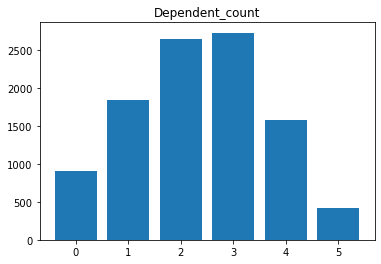

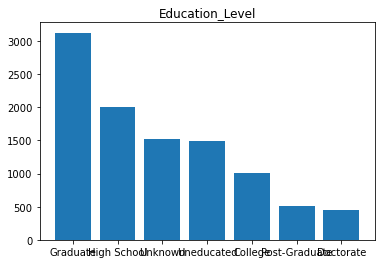

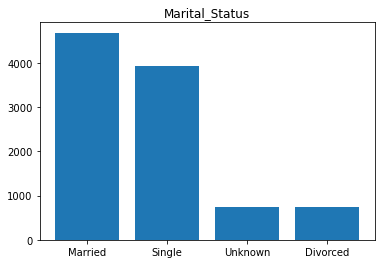

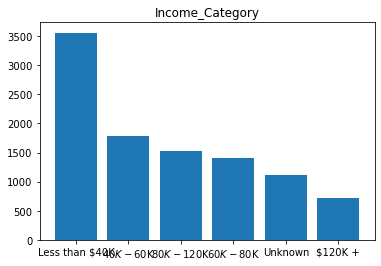

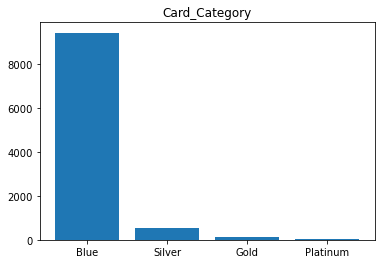

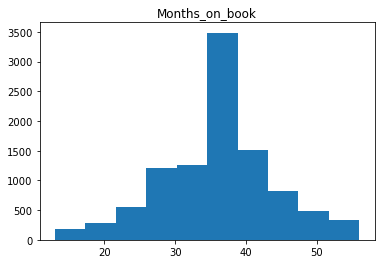

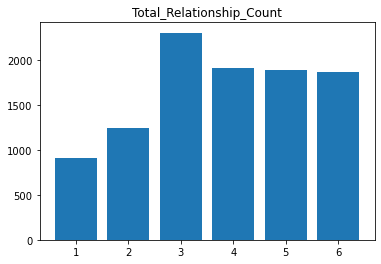

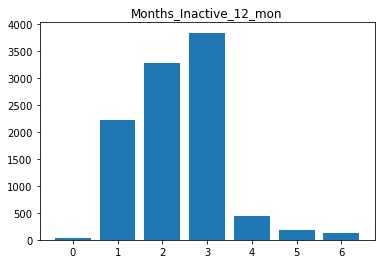

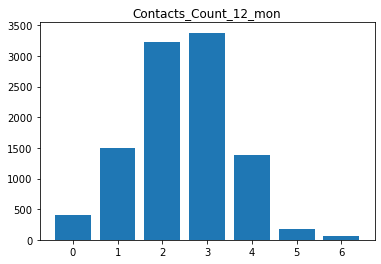

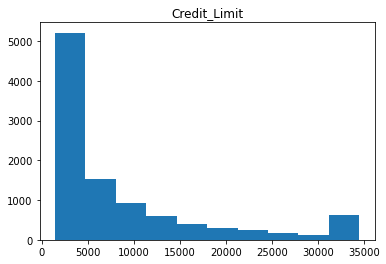

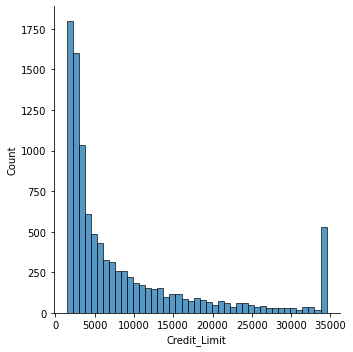

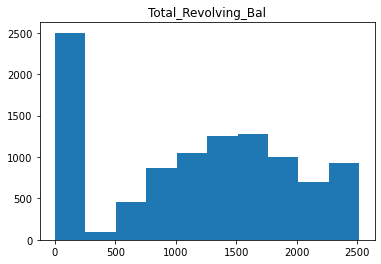

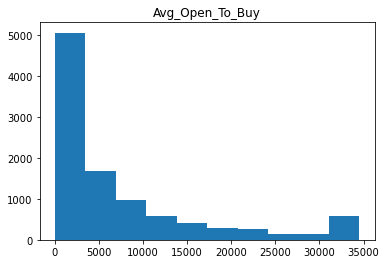

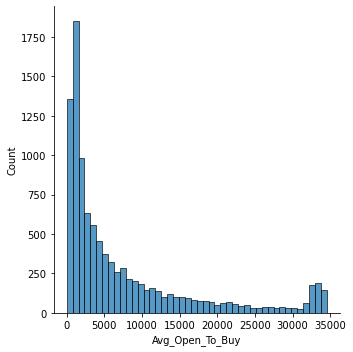

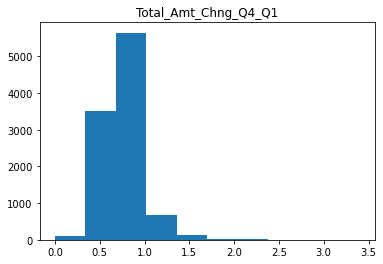

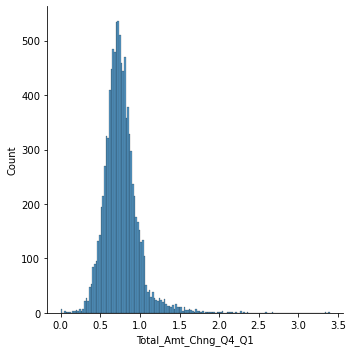

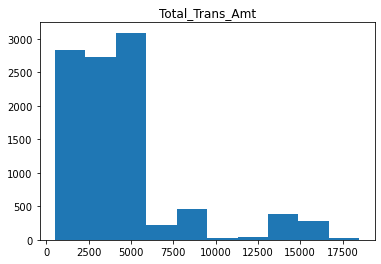

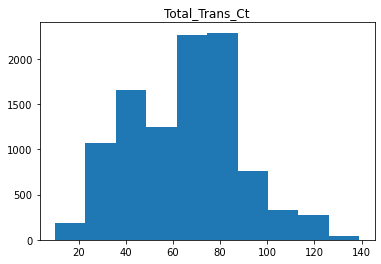

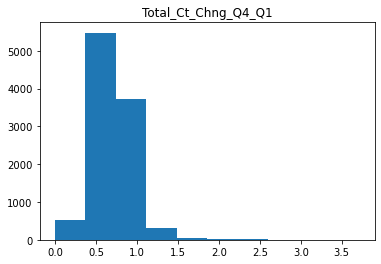

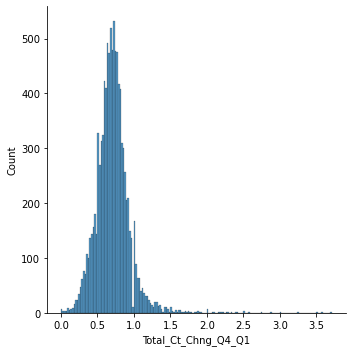

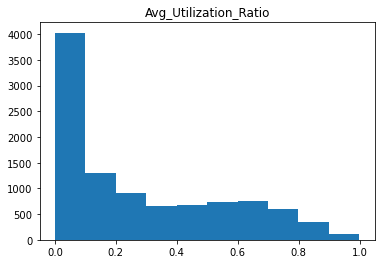

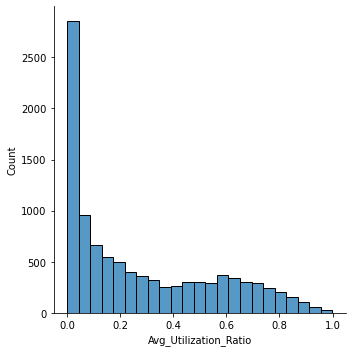

In [15]:
def plot_categorical(col):
    counts = data[col].value_counts()
    plt.bar(counts.index, counts) 
    plt.title(col)
    plt
    plt.show()

for col in data.columns:
    array = data[col]
    if array.dtype == 'float64':
        plt.hist(array)
        plt.title(col)
        ax = sns.displot(array)
        plt.show()
    elif array.dtype == "int64":
        if len(array.unique()) < 11:
            plot_categorical(col)
        else:
            plt.hist(array)
            plt.title(col)
            plt.show()
    else:
        plot_categorical(col)
       
    


### Finding correlations
Next we attempt to find which of the variables are most strongly correlated to attrition. 

#### Correlation values of categorical variables
In order to perform correlation tests between the categorical variables, we need to first convert them into numerical values. For example, the values in `Attrition_Flag` will be converted to `1` and `0` to represent attrited and not attrited, respectively. 

For categorical variables with more than two categories, a separate variable will be generated for each of the possible categories, ignoring unknowns. For example, the variable `Marital_Status` has four possible values: `Single`, `Married`, `Divorced` and `Unknown`. Three columns (`Single`, `Married` and `Divorced`) will replace the `Marital_Status` column and a customer who is married will have `1` in the `Married` column and zero in the rest. Customers with `'Unknown'` Marital_Status will have `0` in all three columns.

In [9]:
conv_data = pd.read_csv('BankChurners.csv').drop(columns='CLIENTNUM')
conv_data['Attrition_Flag'] = conv_data['Attrition_Flag'].replace({'Attrited Customer':1, 'Existing Customer':0})
conv_data['Gender'] = conv_data['Gender'].replace({'F':1, 'M':0})

conv_data = pd.concat([conv_data, pd.get_dummies(conv_data['Education_Level'])],axis=1).drop(columns=['Unknown', 'Education_Level'])
conv_data = pd.concat([conv_data, pd.get_dummies(conv_data['Marital_Status'])],axis=1).drop(columns=['Unknown', 'Marital_Status'])
conv_data = pd.concat([conv_data, pd.get_dummies(conv_data['Income_Category'])],axis=1).drop(columns=['Unknown', 'Income_Category'])
conv_data = pd.concat([conv_data, pd.get_dummies(conv_data['Card_Category'])],axis=1).drop(columns='Card_Category')



conv_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,1,0,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,1,0,0,0,0,1,1,0,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,0,0,1,1,0,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,1,0,1,0,0,0,1,0,0,0
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,...,0,0,0,0,0,1,1,0,0,0
10125,1,30,0,2,36,4,3,3,5281.0,0,...,0,0,1,0,0,0,1,0,0,0


Attrition_Flag              1.000000
Customer_Age                0.018203
Gender                      0.037272
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
College                    -0.007840
Doctorate                   0.029386
Graduate                   -0.009046
High School                -0.011730
Post-Graduate               0.011127
Uneducated                 -0.001444
Divorced                    0.000850
Married                    -0.023735
Single                      0.019037
$120K +                     0.009584
$40K - $60K                -0.011688
$

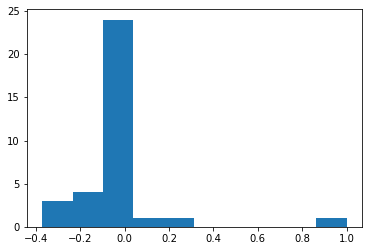

In [14]:
# fig, ax = plt.subplots()
plt.hist(conv_data.corr()['Attrition_Flag'])
# plt.matshow(conv_data.corr())
conv_data.corr()['Attrition_Flag']

### Categorical Attributes Analysis

In [87]:
import plotly.express as px

def plotPies(df,categories = None,dropna = False):

    if categories == None: 
        categories = df.select_dtypes(['object','category']).columns.to_list()
    
    for cat in categories:
        figure = px.pie(df[cat].value_counts(dropna = dropna), values = cat, 
            names = df[cat].value_counts(dropna = dropna).index,title = cat,template = 'simple_white')
        figure.show()

In [ ]:
plotPies(data)

### Correlation Matrix

<AxesSubplot:>

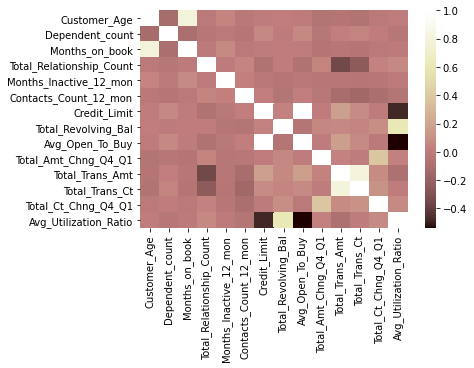

In [125]:
sns.heatmap(data.corr() ,cmap='pink')

### Numerical Attribute Analysis

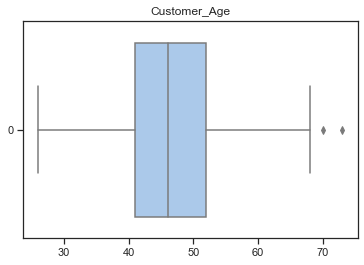

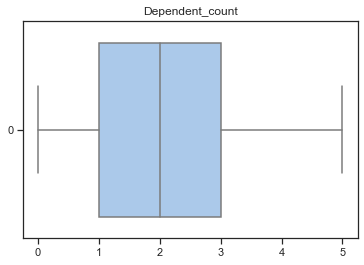

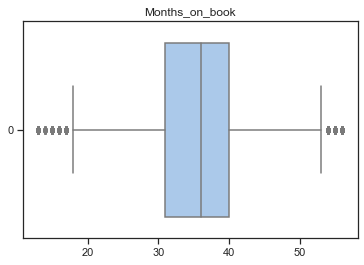

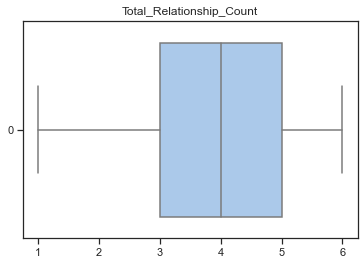

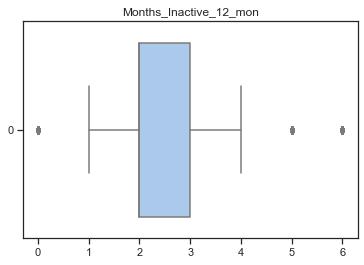

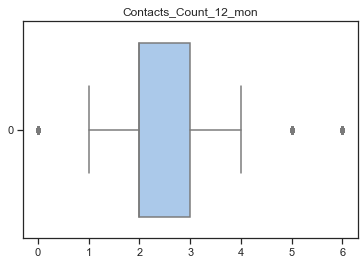

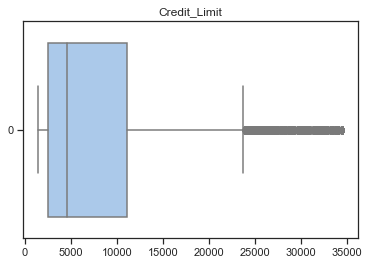

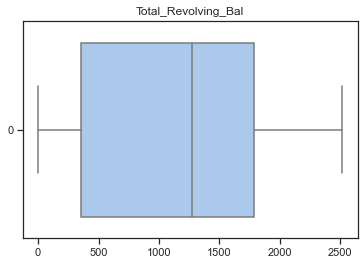

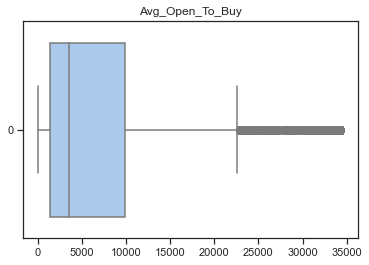

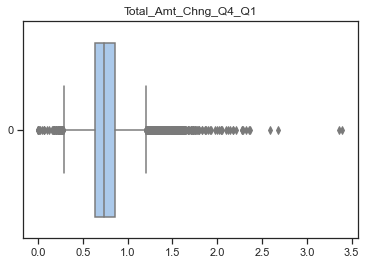

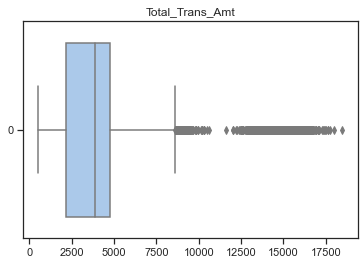

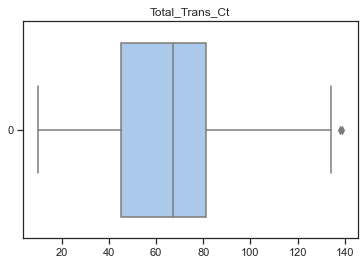

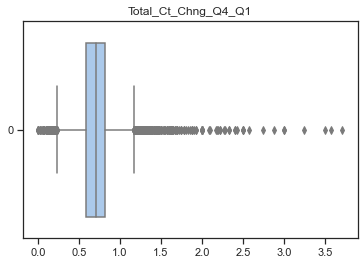

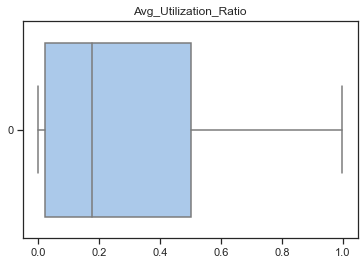

In [138]:
sns.set_theme(style = "ticks", palette = "pastel")

for num in data.select_dtypes('number').columns.to_list():
    sns.boxplot(data = data[num],orient = "h", color = 'b')
    plt.title(num)
    plt.show()